In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
df=pd.read_csv("obesity_level.csv")

In [8]:
df.head()


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [10]:
df.describe()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,0.011803,2.029418,0.033096,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.108000,0.608467,0.178891,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.792022,0.000000,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,0.000000,2.000000,0.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.549617,0.000000,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [11]:
df.describe(include=['O'])

,Gender,CAEC,CALC,MTRANS,0be1dad
count,20758,20758,20758,20758,20758
unique,2,4,3,5,7
top,Female,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17529,15066,16687,4046


In [12]:
df.shape

(20758, 18)

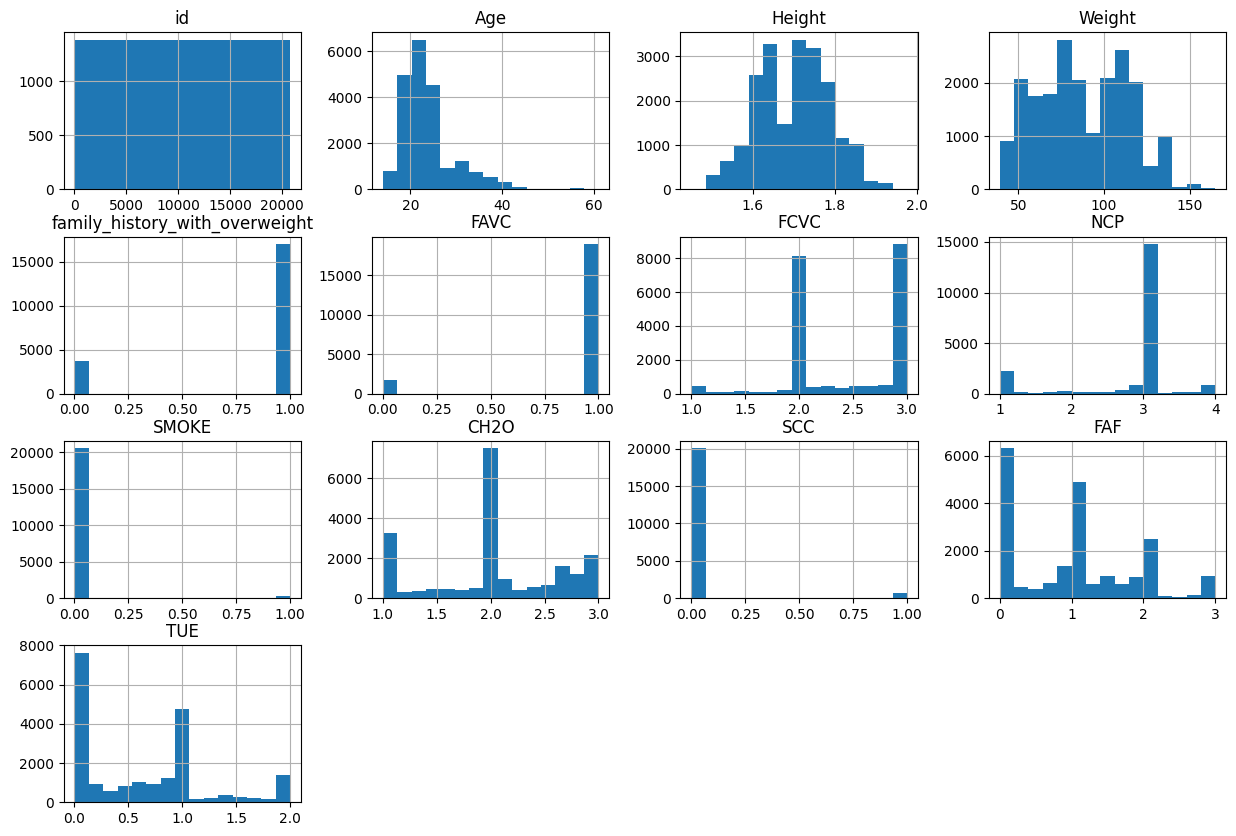

In [13]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()

### VISUALISATION OF CATEGORICAL VARIBLES

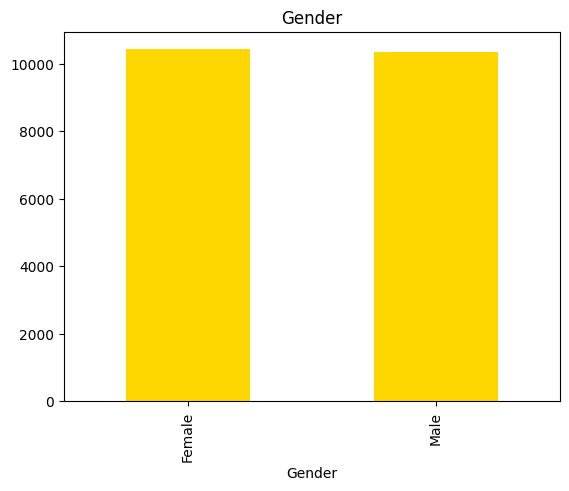

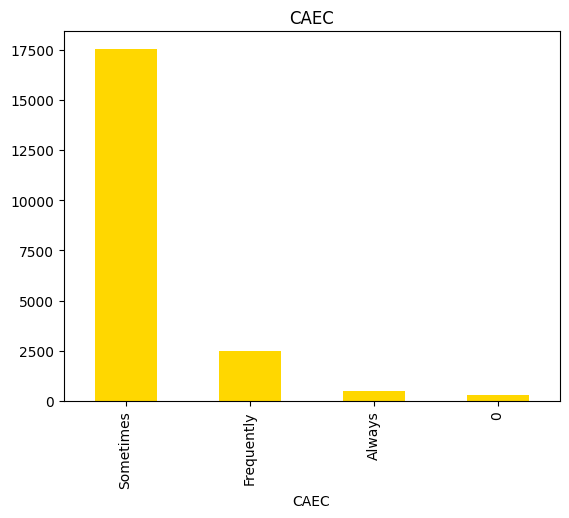

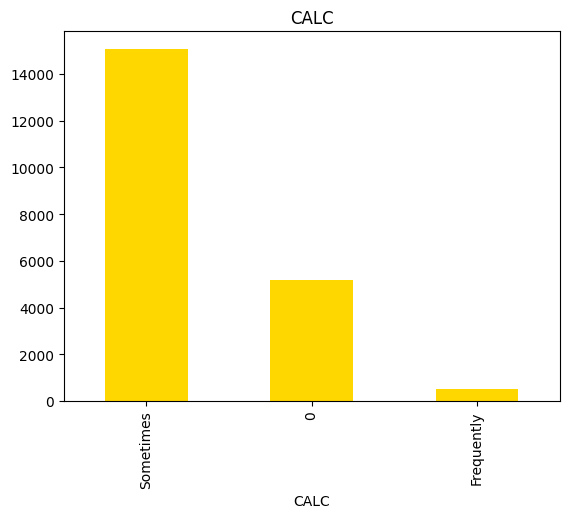

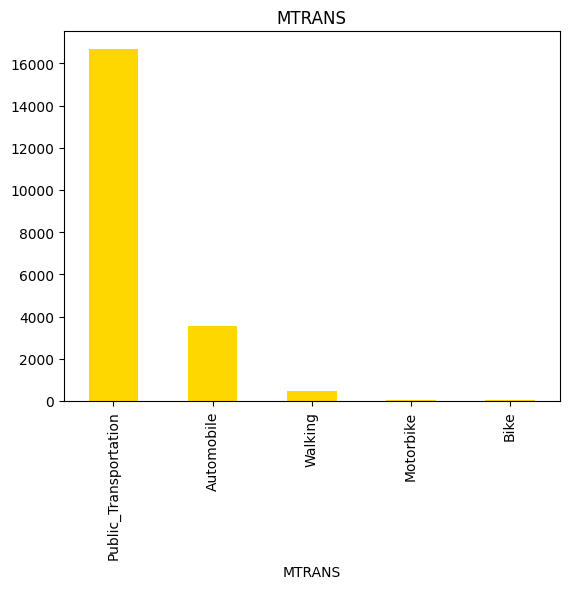

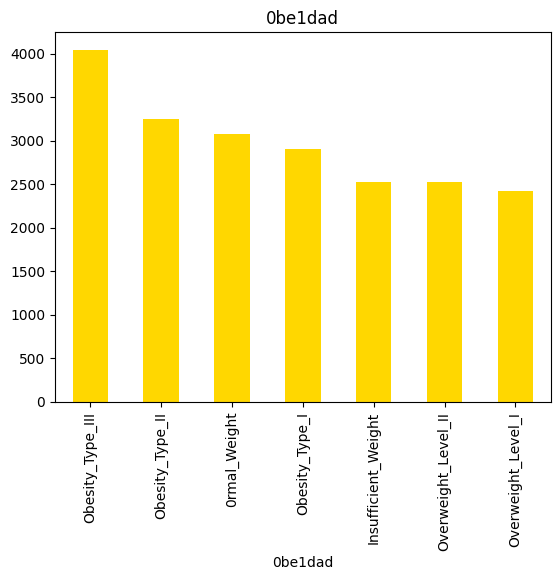

In [14]:
categorical_features = df.select_dtypes(include=['O']).columns.tolist()
for col in categorical_features:
    df[col].value_counts().plot(kind='bar',color="gold")
    plt.title(col)
    #plt.subplot(4,2)
    plt.show()

In [15]:
df['0be1dad'].value_counts()

0be1dad
Obesity_Type_III       4046
Obesity_Type_II        3248
0rmal_Weight           3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [16]:
df["Gender"].value_counts()    # female have been more obese due to more inactivity

Gender
Female    10422
Male      10336
Name: count, dtype: int64

In [17]:
df.rename(columns={'0be1dad': 'Obesity Type'}, inplace=True) #renaming
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'Obesity Type'],
      dtype='object')

# CORRECTING ERRORS IN CATEGORY NAME

In [18]:
df["Obesity Type"]=df["Obesity Type"].replace({"0rmal_Weight":"Normal_weight"})

In [19]:
df.rename(columns={"CH2O":"Amt_water_intake"},inplace=True)
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'Amt_water_intake', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity Type'],
      dtype='object')

In [20]:
df["MTRANS"].value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

In [21]:
df.isnull().sum() # there is no value to drop

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
Amt_water_intake                  0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
Obesity Type                      0
dtype: int64

In [22]:
df.duplicated().any()

False

# no duplicates are seen in the data

<Axes: xlabel='MTRANS'>

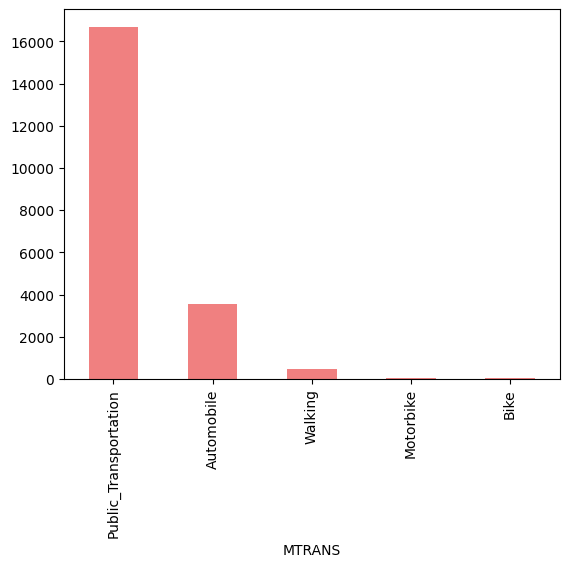

In [23]:
df['MTRANS'].value_counts().plot(kind='bar',color="lightcoral")

### There is a large number of people using public transport which indicates a very low physical activity which may be a reason why a large number of the population is obese .

In [24]:
df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                               int64
Amt_water_intake                  float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
Obesity Type                       object
dtype: object

In [25]:
df["Obesity Type"].value_counts()

Obesity Type
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [26]:
# Updating 'Obesity_Level' in df_obesity_levels to reflect the consolidated four categories
df['Obesity_target'] = df['Obesity Type'].apply(
    lambda x: 'Overweight' if 'Overweight' in x
    else ('Obesity' if 'Obesity' in x
          else x)
)

<Axes: ylabel='count'>

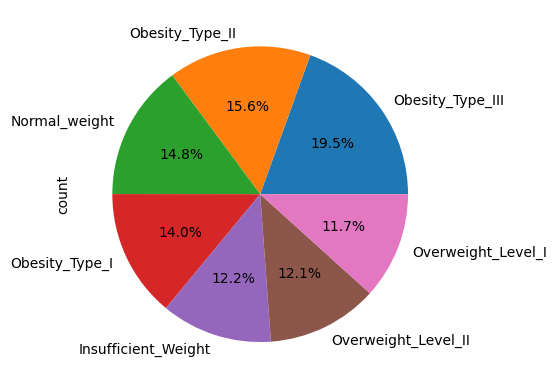

In [27]:
df['Obesity Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [28]:
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,Amt_water_intake,SCC,FAF,TUE,CALC,MTRANS,Obesity Type,Obesity_target
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,Overweight
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,Normal_weight,Normal_weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,Obesity
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,Obesity
20754,20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II,Obesity
20756,20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,0,Automobile,Overweight_Level_II,Overweight


In [29]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Assuming 'df' is your DataFrame
#plt.figure(figsize=(12, 8))

# Using seaborn to plot, with 'Height' on the x-axis, 'Weight' on the y-axis
# 'hue' specifies which column in the dataframe to use for color encoding
#sns.scatterplot(data=df, y="Gender", x='Amt_water_intake', hue='Obesity_target', palette='bright')

#plt.title('Scatter Plot of Weight vs. Height by Obesity Class')
#plt.xlabel('Height')
#plt.ylabel('Weight')
#plt.legend(title='Obesity Class', title_fontsize='13', labelspacing=1.25)
#plt.show()


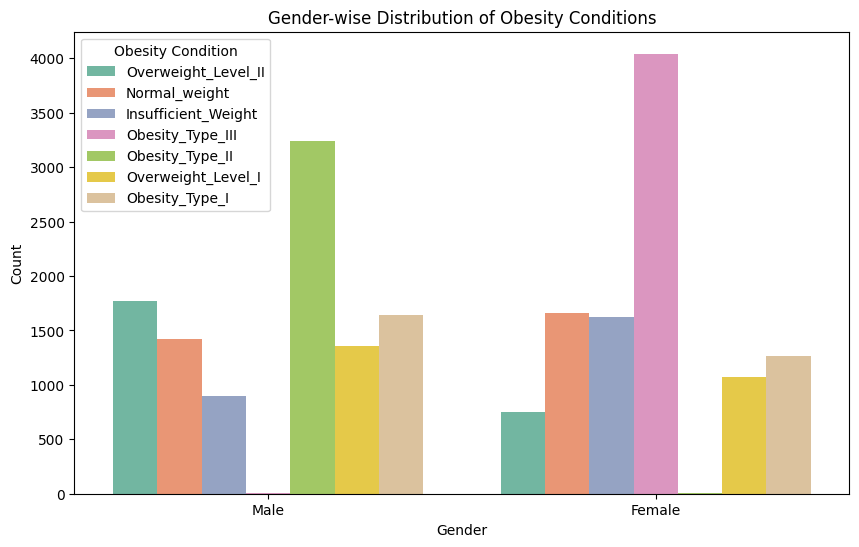

In [30]:
plt.figure(figsize=(10, 6))

# Plotting
sns.countplot(data=df, x='Gender', hue='Obesity Type',palette="Set2")
plt.title('Gender-wise Distribution of Obesity Conditions')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Obesity Condition')

# Show plot
plt.show()

#### Number of females are there in the distribution is more and the corresponding obesity levels is shown below and women are more prone to obesity type 3 and men in obesity type 2.

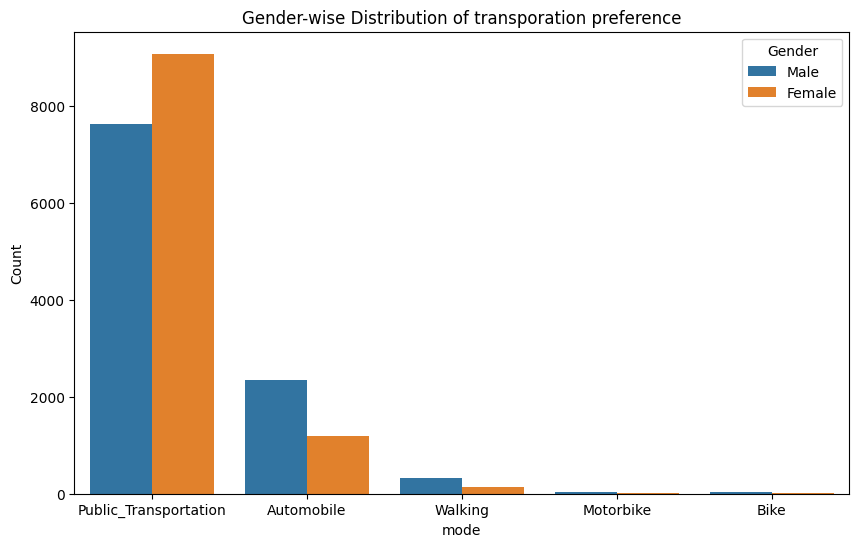

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MTRANS', hue='Gender')
plt.title('Gender-wise Distribution of transporation preference')
plt.xlabel('mode')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# merging classes together for better classification into 4 classes only

In [32]:
df['Obesity_target'] = df['Obesity Type'].apply(
    lambda x: 'Overweight' if 'Overweight' in x
    else ('Obesity' if 'Obesity' in x
          else x)
)


In [33]:
df["Obesity_target"].value_counts()

Obesity_target
Obesity                10204
Overweight              4949
Normal_weight           3082
Insufficient_Weight     2523
Name: count, dtype: int64

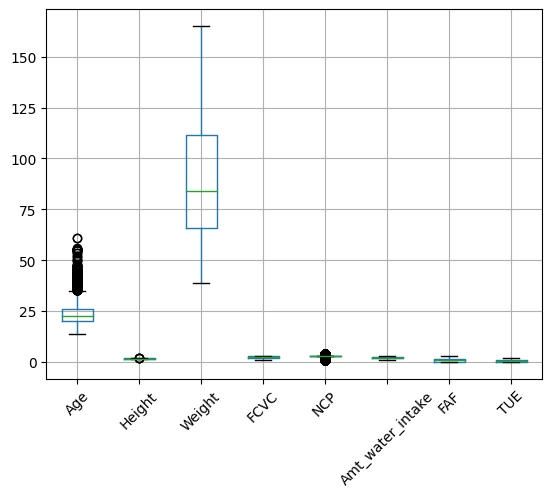

In [34]:
#checking for outliers
df[["Age","Height","Weight","FCVC","NCP","Amt_water_intake","FAF","TUE"]].boxplot()
plt.xticks(rotation=45)
plt.show()

# No significant outliers that has to be removed

<Axes: ylabel='count'>

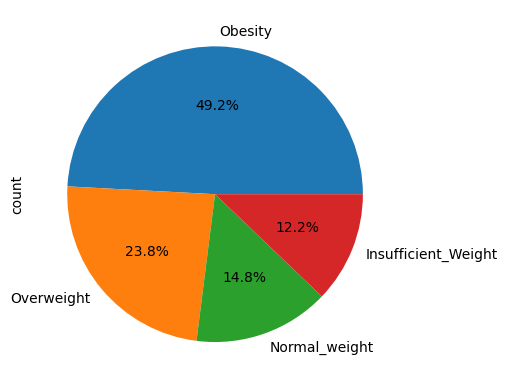

In [35]:
df['Obesity_target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<ipython-input-36-6e4dd7c7eb0f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='bright')


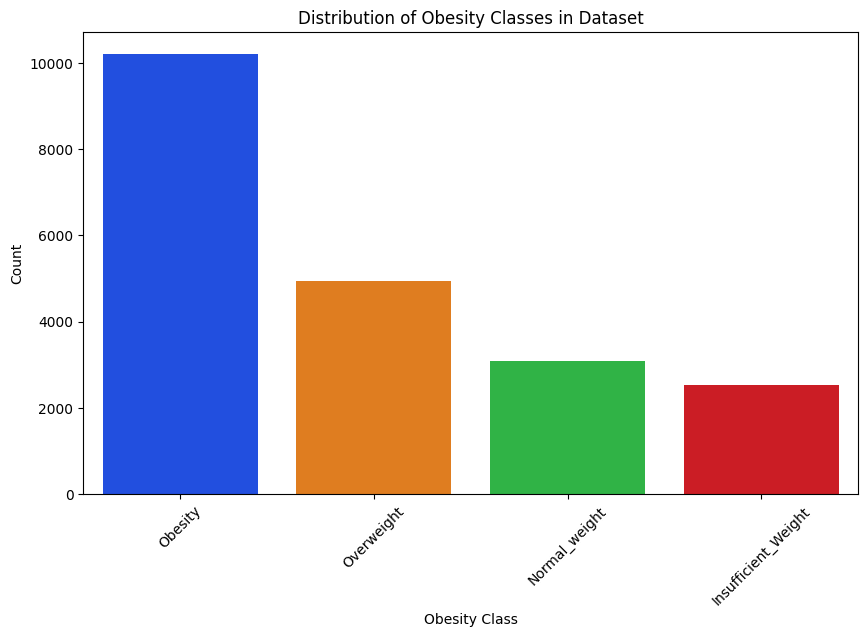

In [36]:
class_counts = df['Obesity_target'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='bright')
plt.title('Distribution of Obesity Classes in Dataset')
plt.xlabel('Obesity Class')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates labels to make them readable
plt.show()

In [37]:
#type convertion for age and
df['Age'] = df['Age'].astype(int)
df['NCP'] = df['NCP'].astype(int)
df['FAF']= df['FAF'].astype(int)

In [38]:
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,Amt_water_intake,SCC,FAF,TUE,CALC,MTRANS,Obesity Type,Obesity_target
0,0,Male,24,1.699998,81.669950,1,1,2.000000,2,Sometimes,0,2.763573,0,0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,Overweight
1,1,Female,18,1.560000,57.000000,1,1,2.000000,3,Frequently,0,2.000000,0,1,1.000000,0,Automobile,Normal_weight,Normal_weight
2,2,Female,18,1.711460,50.165754,1,1,1.880534,1,Sometimes,0,1.910378,0,0,1.673584,0,Public_Transportation,Insufficient_Weight,Insufficient_Weight
3,3,Female,20,1.710730,131.274851,1,1,3.000000,3,Sometimes,0,1.674061,0,1,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,Obesity
4,4,Male,31,1.914186,93.798055,1,1,2.679664,1,Sometimes,0,1.979848,0,1,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25,1.766626,114.187096,1,1,2.919584,3,Sometimes,0,2.151809,0,1,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,Obesity
20754,20754,Male,18,1.710000,50.000000,0,1,3.000000,4,Frequently,0,1.000000,0,2,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,Insufficient_Weight
20755,20755,Male,20,1.819557,105.580491,1,1,2.407817,3,Sometimes,0,2.000000,0,1,1.198439,0,Public_Transportation,Obesity_Type_II,Obesity
20756,20756,Male,33,1.700000,83.520113,1,1,2.671238,1,Sometimes,0,2.144838,0,0,0.973834,0,Automobile,Overweight_Level_II,Overweight


In [39]:
numerical = df.select_dtypes(include=['int64', 'float64']).corr()

Text(0.5, 1.0, 'Relation Between Numerical Variables')

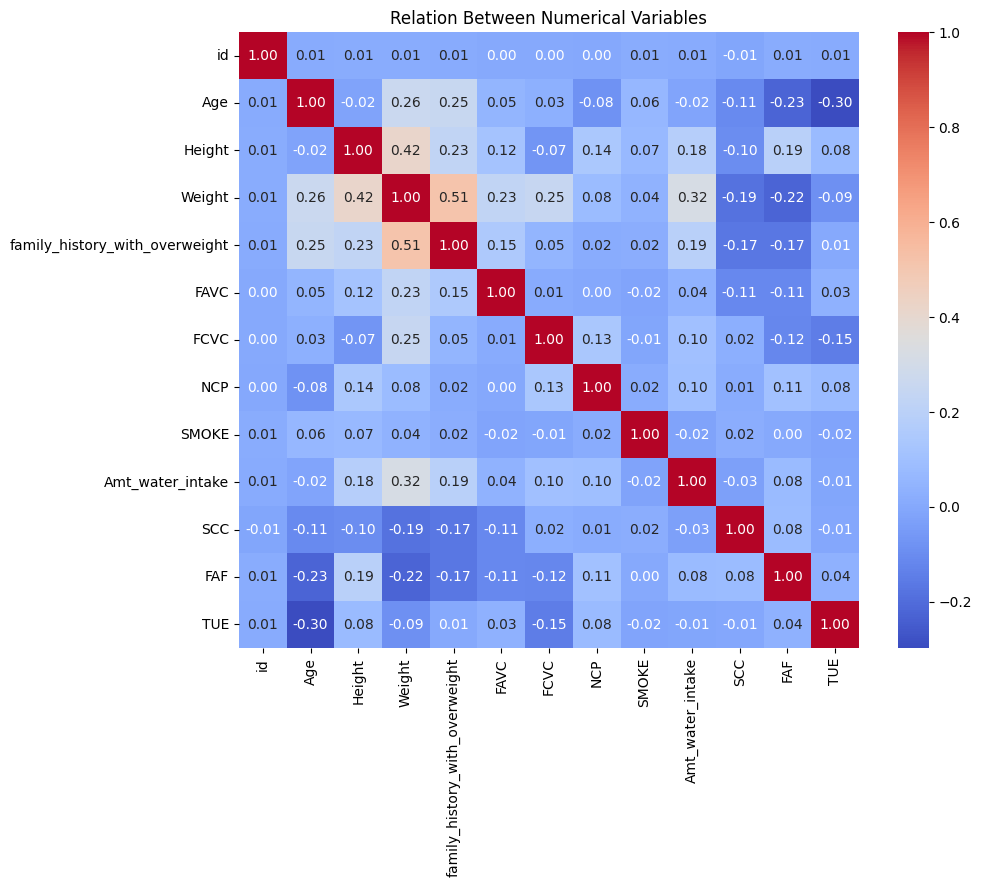

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical, annot=True, fmt=".2f", cmap='coolwarm').set_title('Relation Between Numerical Variables')




# PHASE 3
## ENCODING, MODEL BUILDING AND METRICS

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [42]:
X=df.drop({"Obesity_target","Obesity Type","id"},axis=1)
y=df["Obesity_target"]

In [43]:
y

0                 Overweight
1              Normal_weight
2        Insufficient_Weight
3                    Obesity
4                 Overweight
                ...         
20753                Obesity
20754    Insufficient_Weight
20755                Obesity
20756             Overweight
20757                Obesity
Name: Obesity_target, Length: 20758, dtype: object

In [44]:
df_numeric=df[["Age","Height","Weight","FCVC","NCP","Amt_water_intake","FAF","TUE"]]
df_label=df[["Gender" ]]
df_ohe=df[["CAEC","CALC","MTRANS"]]

In [45]:
#Standard Scalar
df_numeric=df[["Age","Height","Weight","FCVC","NCP","Amt_water_intake","FAF","TUE"]]

scaler = StandardScaler()
columns_to_scale = df_numeric.columns
df_numeric[columns_to_scale] = scaler.fit_transform(df_numeric[columns_to_scale])

<ipython-input-45-9e9890955a16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[columns_to_scale] = scaler.fit_transform(df_numeric[columns_to_scale])


In [46]:
# One hot encoding
categorical_features = ["CAEC", "CALC", "MTRANS"]

encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[categorical_features])

df_ohe = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_features))

In [47]:
# Label Encoding
df_label=df[["Gender" ]]
label_encoder = LabelEncoder()

col = df_label.columns
df_label = pd.DataFrame(label_encoder.fit_transform(df["Gender"]), columns=col)


In [48]:
# Concatinating all the dataframes to get X
X = df_numeric.copy()
for col in df_ohe.columns:
    X[col] = df_ohe[col].values

for col in df_label.columns:
    X[col] = df_label[col].values

X.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'Amt_water_intake', 'FAF',
       'TUE', 'CAEC_0', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes',
       'CALC_0', 'CALC_Frequently', 'CALC_Sometimes', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'Gender'],
      dtype='object')

In [49]:
X

,Age,Height,Weight,FCVC,NCP,Amt_water_intake,FAF,TUE,CAEC_0,CAEC_Always,...,CAEC_Sometimes,CALC_0,CALC_Frequently,CALC_Sometimes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender
0,0.077086,-0.002828,-0.235713,-0.836279,-0.874898,1.206594,-0.934617,0.597438,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,-0.988500,-1.606291,-1.170931,-0.836279,0.443898,-0.048349,0.274305,0.636513,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,-0.988500,0.128451,-1.430012,-1.060332,-2.193694,-0.195644,-0.934617,1.755239,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.633304,0.120090,1.644770,1.039171,0.443898,-0.584035,0.274305,0.271455,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,1.320270,2.450367,0.224054,0.438397,-2.193694,-0.081469,0.274305,0.523111,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.254684,0.760293,0.996987,0.888355,0.443898,0.201151,0.274305,-0.697686,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
20754,-0.988500,0.111729,-1.436296,1.039171,1.762693,-1.691863,1.483226,0.636513,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
20755,-0.633304,1.366537,0.670717,-0.071439,0.443898,-0.048349,0.274305,0.966092,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
20756,1.675465,-0.002805,-0.165574,0.422594,-2.193694,0.189694,-0.934617,0.593055,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [50]:
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
relevant_features_univariate = X.columns[selector.get_support()]
print("Univariate feature selection relevant features:", relevant_features_univariate)

Univariate feature selection relevant features: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'Amt_water_intake', 'FAF',
       'TUE', 'CAEC_0', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes',
       'CALC_0', 'CALC_Frequently', 'CALC_Sometimes', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'Gender'],
      dtype='object')


In [51]:
X

,Age,Height,Weight,FCVC,NCP,Amt_water_intake,FAF,TUE,CAEC_0,CAEC_Always,...,CAEC_Sometimes,CALC_0,CALC_Frequently,CALC_Sometimes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender
0,0.077086,-0.002828,-0.235713,-0.836279,-0.874898,1.206594,-0.934617,0.597438,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,-0.988500,-1.606291,-1.170931,-0.836279,0.443898,-0.048349,0.274305,0.636513,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,-0.988500,0.128451,-1.430012,-1.060332,-2.193694,-0.195644,-0.934617,1.755239,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.633304,0.120090,1.644770,1.039171,0.443898,-0.584035,0.274305,0.271455,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,1.320270,2.450367,0.224054,0.438397,-2.193694,-0.081469,0.274305,0.523111,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.254684,0.760293,0.996987,0.888355,0.443898,0.201151,0.274305,-0.697686,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
20754,-0.988500,0.111729,-1.436296,1.039171,1.762693,-1.691863,1.483226,0.636513,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
20755,-0.633304,1.366537,0.670717,-0.071439,0.443898,-0.048349,0.274305,0.966092,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
20756,1.675465,-0.002805,-0.165574,0.422594,-2.193694,0.189694,-0.934617,0.593055,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


# FEATURE IMPORTANCE

In [52]:
rf_model = RandomForestClassifier()
rf_model.fit(X, y)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
relevant_features_tree_based = feature_importances.sort_values(ascending=False).index[:5]
print("Tree-based feature importance relevant features:", relevant_features_tree_based)

Tree-based feature importance relevant features: Index(['Weight', 'Height', 'Age', 'Amt_water_intake', 'TUE'], dtype='object')


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [54]:
models = {'Logistic Regression': LogisticRegression(max_iter=1000), #max iter min the cost fns
    'Random Forest': RandomForestClassifier(),'KNN':KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)}

In [55]:
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,Amt_water_intake,SCC,FAF,TUE,CALC,MTRANS,Obesity Type,Obesity_target
0,0,Male,24,1.699998,81.669950,1,1,2.000000,2,Sometimes,0,2.763573,0,0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,Overweight
1,1,Female,18,1.560000,57.000000,1,1,2.000000,3,Frequently,0,2.000000,0,1,1.000000,0,Automobile,Normal_weight,Normal_weight
2,2,Female,18,1.711460,50.165754,1,1,1.880534,1,Sometimes,0,1.910378,0,0,1.673584,0,Public_Transportation,Insufficient_Weight,Insufficient_Weight
3,3,Female,20,1.710730,131.274851,1,1,3.000000,3,Sometimes,0,1.674061,0,1,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,Obesity
4,4,Male,31,1.914186,93.798055,1,1,2.679664,1,Sometimes,0,1.979848,0,1,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25,1.766626,114.187096,1,1,2.919584,3,Sometimes,0,2.151809,0,1,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,Obesity
20754,20754,Male,18,1.710000,50.000000,0,1,3.000000,4,Frequently,0,1.000000,0,2,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,Insufficient_Weight
20755,20755,Male,20,1.819557,105.580491,1,1,2.407817,3,Sometimes,0,2.000000,0,1,1.198439,0,Public_Transportation,Obesity_Type_II,Obesity
20756,20756,Male,33,1.700000,83.520113,1,1,2.671238,1,Sometimes,0,2.144838,0,0,0.973834,0,Automobile,Overweight_Level_II,Overweight


In [56]:
y

0                 Overweight
1              Normal_weight
2        Insufficient_Weight
3                    Obesity
4                 Overweight
                ...         
20753                Obesity
20754    Insufficient_Weight
20755                Obesity
20756             Overweight
20757                Obesity
Name: Obesity_target, Length: 20758, dtype: object

In [57]:
X

,Age,Height,Weight,FCVC,NCP,Amt_water_intake,FAF,TUE,CAEC_0,CAEC_Always,...,CAEC_Sometimes,CALC_0,CALC_Frequently,CALC_Sometimes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender
0,0.077086,-0.002828,-0.235713,-0.836279,-0.874898,1.206594,-0.934617,0.597438,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,-0.988500,-1.606291,-1.170931,-0.836279,0.443898,-0.048349,0.274305,0.636513,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,-0.988500,0.128451,-1.430012,-1.060332,-2.193694,-0.195644,-0.934617,1.755239,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.633304,0.120090,1.644770,1.039171,0.443898,-0.584035,0.274305,0.271455,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,1.320270,2.450367,0.224054,0.438397,-2.193694,-0.081469,0.274305,0.523111,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.254684,0.760293,0.996987,0.888355,0.443898,0.201151,0.274305,-0.697686,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
20754,-0.988500,0.111729,-1.436296,1.039171,1.762693,-1.691863,1.483226,0.636513,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
20755,-0.633304,1.366537,0.670717,-0.071439,0.443898,-0.048349,0.274305,0.966092,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
20756,1.675465,-0.002805,-0.165574,0.422594,-2.193694,0.189694,-0.934617,0.593055,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [58]:
#making a pipeline
for n,model in models.items():
  pipeline=make_pipeline(SelectKBest(score_func=f_classif, k='all'), model)
  pipeline.fit(X_train,y_train)
  predictions=pipeline.predict(X_test)
  accuracy = accuracy_score(y_test,predictions)
  precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')
  print(f"{n}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")

Logistic Regression: Accuracy=0.9127, Precision=0.9125, Recall=0.9127, F1=0.9122
Random Forest: Accuracy=0.9234, Precision=0.9246, Recall=0.9234, F1=0.9238
KNN: Accuracy=0.8102, Precision=0.8098, Recall=0.8102, F1=0.8099
Decision Tree: Accuracy=0.8984, Precision=0.8982, Recall=0.8984, F1=0.8983


#PHASE 5 AND 6: HYPERPARAMETER TUNING AND MODEL EVALUTAION

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Define your models and their corresponding parameter grids to be searched over
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'model__max_iter': [1000],
            'model__C': [0.1, 1, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7, 9],
            'model__weights': ['uniform', 'distance'],
            'model__metric': ['euclidean', 'manhattan']
}},
    'Decision Tree': {
    'model': DecisionTreeClassifier(),
    'params': {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 10, 20, 30, 40, 50],
        'model__min_samples_split': [2, 5, 10, 15],
        'model__min_samples_leaf': [1, 2, 5, 10]
    }
    }}

for name, info in models.items():
    # Create a pipeline with SelectKBest and the model
    pipeline = Pipeline([
        ('select', SelectKBest(score_func=f_classif, k='all')),
        ('model', info['model'])
    ])

    # Setup RandomizedSearchCV
    search = RandomizedSearchCV(pipeline, info['params'], n_iter=10, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')

    # Fit RandomizedSearchCV to the training data
    search.fit(X_train, y_train)

    # Best model
    best_model = search.best_estimator_

    # Make predictions with the best model
    predictions = best_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')

    # Print performance metrics
    print(f"{name} - Best Parameters: {search.best_params_}")
    print(f"{name}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}\n")


Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Logistic Regression - Best Parameters: {'model__max_iter': 1000, 'model__C': 10}
Logistic Regression: Accuracy=0.9130, Precision=0.9127, Recall=0.9130, F1=0.9125

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest - Best Parameters: {'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': None}
Random Forest: Accuracy=0.9276, Precision=0.9286, Recall=0.9276, F1=0.9279

Fitting 5 folds for each of 10 candidates, totalling 50 fits
KNN - Best Parameters: {'model__weights': 'distance', 'model__n_neighbors': 7, 'model__metric': 'manhattan'}
KNN: Accuracy=0.8359, Precision=0.8371, Recall=0.8359, F1=0.8364

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Decision Tree - Best Parameters: {'model__min_samples_split': 2, 'model__min_samples_leaf': 10, 'model__max_depth': 30, 'model__criterion': 'entropy'}
Decision Tree: Accuracy=0.9194, Precision=0.9198, Recall=0.9194, F1=0.9196



# SUMMARY :
- Random forest has high precision and recall values but decision trees exhibit the  most significant improvement post-tuning, especially in the F1 score, which is crucial for a balanced performance.

- When it comes complexity vs Interpretability Logistic Regression  and Decision tree offer better interpretability than KNN or Random forest if the case has to be presented non domain knowledge people choosing one of this method is preferred.

- So the final best suited model for case study done will be Random Forest if accuracy is our top priority with handling error with slight comparimising of interpretability if not Decision tree also is alternative suggested model.

RECOMMENDATION:
- There must be more physical activity and a good amount of water intake among females to prevent obesity.

- Females and Male must prefer walking as a part of their daily routine.

- Vegetables being high in nutrition and fibrous vegetables must be consumed as they have both obesity risk reduction but also insufficient weight leading to malnourished nature is prevented directly.
